### Initializing the libraries

In [4]:
from sklearn.metrics import *
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV

#uncomment it if you want to use graphviz
#from graphviz import Source 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import random as rn
import scipy as sp

### Example synthetic data sets

* syn1 - syn3 : Synthetic 2D binary classification problems
* spiral : Consists of two 2-D spirals, one for each class.

Remember to set the random seed when generating the datasets, if you want reproducible output.

In [5]:
def syn1(N):
    """ data(samples, features)"""
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)
  
    data[:N1,0] = 4 + np.random.normal(loc=.0, scale=1., size=(N1))
    data[N1:,0] = -4 + np.random.normal(loc=.0, scale=1., size=(N-N1))
    data[:,1] = 10*np.random.normal(loc=.0, scale=1., size=(N))
    
    
    data = data / data.std(axis=0)
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    # Rotation
    theta = np.radians(30)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]]) # rotation matrix
    data = np.dot(data,R) 
    
    return data,tar


def syn2(N):
    """ data(samples, features)"""
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    data[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))
    # Negative samples 
    data[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    
    # Target
    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))

    return data,tar


def syn3(N):
    """ data(samples, features)"""
    data = np.empty(shape=(N,2), dtype = np.float32)  
    tar = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(2*N/3)
    
    # disk
    teta_d = np.random.uniform(0, 2*np.pi, N1)
    inner, outer = 3, 5
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N1))
    data[:N1,0],data[:N1,1] = r2*np.cos(teta_d), r2*np.sin(teta_d)
        
    #circle
    teta_c = np.random.uniform(0, 2*np.pi, N-N1)
    inner, outer = 0, 2
    r2 = np.sqrt(np.random.uniform(inner**2, outer**2, N-N1))
    data[N1:,0],data[N1:,1] = r2*np.cos(teta_c), r2*np.sin(teta_c)
    

    tar[:N1] = np.ones(shape=(N1,))
    tar[N1:] = np.zeros(shape=(N-N1,))
    
    return data, tar

def spirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    nturn = 3
    n = np.sqrt(np.random.rand(n_points,1)) * nturn * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))


### Visualizing data

Here we generate some 100 data samples and visualize them.

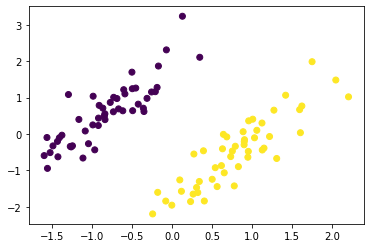

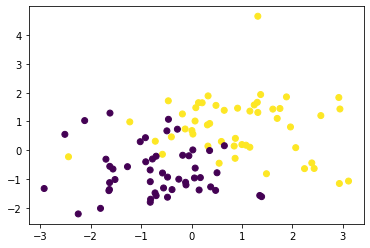

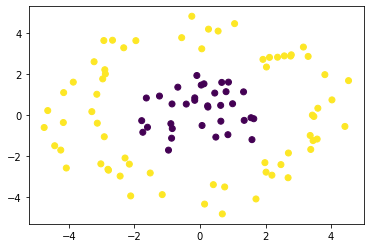

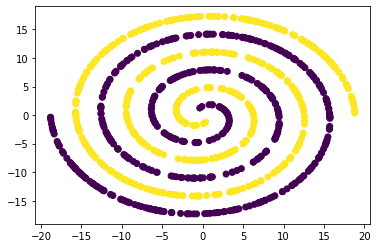

In [6]:
# seed = 0 means random, seed > 0 means fixed
seed = 42
np.random.seed(seed) if seed else None

d,t = syn1(100)
plt.figure(1)
plt.scatter(d[:,0],d[:,1], c=t)

d,t = syn2(100)
plt.figure(2)
plt.scatter(d[:,0],d[:,1], c=t)

d,t = syn3(100)
plt.figure(3)
plt.scatter(d[:,0],d[:,1], c=t)

d,t = spirals(500, 0)
plt.figure(4)
plt.scatter(d[:,0],d[:,1], c=t)
plt.show()